In [73]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import numpy as np
import pandas as pd

from config.experiment_config import ExperimentConfig

config = ExperimentConfig()

In [75]:
market_data = pd.read_excel(config.PATH_INPUT / config.INPUT_DATA_FILENAME)
market_data = market_data.rename(columns={"Date": "date"})
market_data["date"] = pd.to_datetime(market_data["date"])
market_data = market_data.set_index("date")
market_data["lagged_MKT"] = market_data["_MKT"]
market_data.head()

,EMP,PE,CAPE,DY,Rho,MOV,IR,RR,Y02,Y10,...,NYF,_AU,_DXY,_LCP,_TY,_OIL,_MKT,_VA,_GR,lagged_MKT
date,,,,,,,,,,,,,,,,,,,,,
1988-04-10,0.022086,12.9,14.469,3.60,-0.083,118.0,6.02,-1.061,7.459,8.484,...,6.896895,450.50,89.14,2473.7,97.990,16.88,419.06,823.219,462.551,419.06
1988-04-17,0.022086,12.4,13.960,3.75,-0.078,121.0,5.88,-0.760,7.582,8.737,...,2.631749,456.25,88.31,2328.2,96.534,18.37,404.66,823.219,462.551,404.66
1988-04-24,0.022086,12.4,13.950,3.75,-0.051,123.0,5.83,-0.760,7.618,8.773,...,2.631749,449.25,88.89,2201.4,96.470,18.30,404.71,823.219,462.551,404.71
1988-05-01,0.021941,12.5,14.036,3.75,-0.054,124.2,5.98,-0.760,7.728,8.873,...,2.631749,449.00,89.16,2147.8,96.005,18.00,407.55,840.891,461.176,407.55
1988-05-08,0.022104,12.3,13.761,3.82,-0.079,118.4,6.29,-0.760,7.885,8.990,...,2.631749,443.00,89.30,2200.9,95.446,17.74,401.29,840.891,461.176,401.29


In [76]:
from ipsqt.market_data.risk_free_conventions import accrue_risk_free_rate

In [93]:
FEATURES = ["CAPE", "STP", "DIL"]
NOT_DIFF = ["_MKT", "IR", "STP", "DIL", "MKT_Factor"]

data = market_data[FEATURES + ["IR", "_MKT"]]
# data["lagged_MKT"] = data["_MKT"]
data["_MKT"] = data["_MKT"].pct_change()
data["IR"] = data["IR"] / 100 / 360
data["IR"] = accrue_risk_free_rate(data["IR"])
data["MKT_Factor"] = data["_MKT"] - data["IR"]
# data[data.columns.difference(NOT_DIFF)] = np.log(
#     data[data.columns.difference(NOT_DIFF)]
# ).diff()
data.iloc[1:].to_csv(config.PATH_OUTPUT / config.DF_FILENAME)

/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_17739/3004234346.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["_MKT"] = data["_MKT"].pct_change()
/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_17739/3004234346.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["IR"] = data["IR"] / 100 / 360
/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_17739/3004234346.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [92]:
data

,IR,_MKT,MKT_Factor,lagged_MKT
date,,,,
1988-04-10,NaN,NaN,NaN,NaN
1988-04-17,0.001143,-0.034363,-0.035506,-0.034363
1988-04-24,0.001134,0.000124,-0.001010,0.000124
1988-05-01,0.001163,0.007017,0.005855,0.007017
1988-05-08,0.001223,-0.015360,-0.016583,-0.015360
...,...,...,...,...
2024-04-07,0.001043,-0.009351,-0.010394,-0.009351
2024-04-14,0.001047,-0.016173,-0.017220,-0.016173
2024-04-21,0.001049,-0.030627,-0.031676,-0.030627


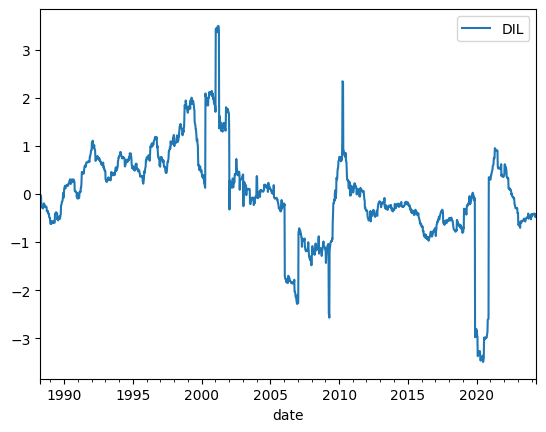

In [78]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
d = ss.fit_transform(data[["DIL"]])
d = pd.DataFrame(d, index=data.index, columns=["DIL"])

d.plot();

/Users/buchkovv/ipsqt/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/buchkovv/ipsqt/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


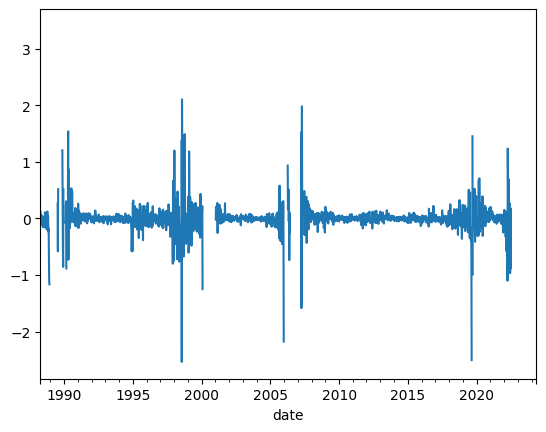

In [79]:
np.log(data["STP"]).diff().plot();

In [80]:
# market_data["_MKT"].apply(lambda x: 1).to_csv(
#     config.PATH_OUTPUT / config.PRESENCE_MATRIX_FILENAME
# )